In [3]:
# -*- coding: utf-8 -*-

__author__ = 'Aleksander Eriksen', 'Eirik Høyheim'
__email__ = 'jaer@nmbu.no', 'eirihoyh@nmbu.no'

import random
import numpy as np


def throw_dice():
	return random.randint(1, 6)


def single_game(num_players):
	"""
	Returns duration of single game.

	Arguments
	---------
	num_players : int
	    Number of players in the game

	Returns
	-------
	num_moves : int
	    Number of moves the winning player needed to reach the goal
	"""
	snake_ladder = {1 : 40, 8: 10, 36: 52, 43: 62, 49: 79, 65: 82, 68: 85,
					24: 5, 33: 3, 42: 30, 56: 37, 64: 27, 74: 12, 87: 70}

	player_pos = [0] * num_players  # Initializing player positions
	player_moves = [0] * num_players  # Initializing player moves

	for game in range(num_players):  # Going through each players game

		while player_pos[game] < 90:  # Done when player reaches 90
			player_pos[game] += throw_dice()  # adding dice-value to position

			# Checking if player position is in snake or ladder position
			# If so, it replaces the position accordingly.
			if player_pos[game] in snake_ladder:
				player_pos[game] = snake_ladder[player_pos[game]]

			player_moves[game] += 1  # moves/turns of the player

	winner = min(player_moves)  # player with lowest moves wins

	return winner


def multiple_games(num_games, num_players):
	"""
	Returns durations of a number of games.

	Arguments
	---------
	num_games : int
		Number of games to play
	num_players : int
		Number of players in the game

	Returns
	-------
	num_moves : list
		List with the number of moves needed in each game.
	"""
	return [single_game(num_players) for _ in range(num_games)]


def multi_game_experiment(num_games, num_players, seed):
	"""
	Returns durations of a number of games when playing with given seed.

	Arguments
	---------
	num_games : int
		Number of games to play
	num_players : int
		Number of players in the game
	seed : int
		Seed used to initialise the random number generator

	Returns
	-------
	num_moves : list
		List with the number of moves needed in each game.
	"""
	random.seed(seed)
	return multiple_games(num_games, num_players)


if __name__ == "__main__":
	game_simulation = sorted(multi_game_experiment(100, 4, 3))

	shortest_game = min(game_simulation)
	longest_game = max(game_simulation)
	median_game = np.median(game_simulation)
	mean_game = np.mean(game_simulation)
	std_deviation = np.std(game_simulation)

	print(f'The shortest game was {shortest_game} moves, \n'
		  f'and the longest game was {longest_game} moves.')

	print(f'\nThe median game duration was {median_game} moves')

	print(f'The mean game duration was {mean_game:.1f} moves, \n'
		  f'and its standard deviation is {std_deviation:.1f}.')


The shortest game was 5 moves, 
and the longest game was 55 moves.

The median game duration was 16.0 moves
The mean game duration was 17.7 moves, 
and its standard deviation is 8.0.


Text(0, 0.5, 'Winning players')

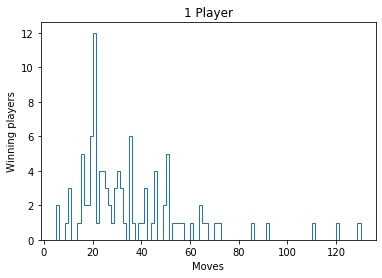

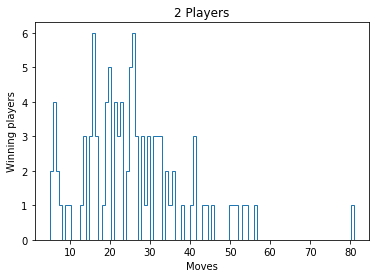

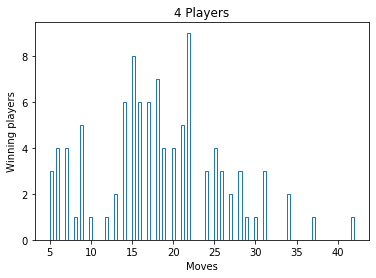

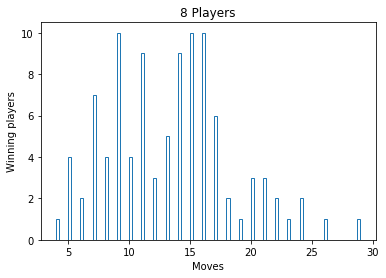

In [82]:
from matplotlib import pyplot as plt
games = 100 # Running 100 simulations


plt.subplots()


one_player = multiple_games(games, 1)
plot_one = plt.hist(one_player, histtype = 'step', bins = games)
plt.title('1 Player')
plt.xlabel('Moves')
plt.ylabel('Winning players')

plt.figure()
two_player = multiple_games(games, 2)
plot_two = plt.hist(two_player, histtype = 'step', bins = games)
plt.title('2 Players')
plt.xlabel('Moves')
plt.ylabel('Winning players')


plt.figure()
four_player = multiple_games(games, 4)
plot_four = plt.hist(four_player, histtype = 'step', bins = games)
plt.title('4 Players')
plt.xlabel('Moves')
plt.ylabel('Winning players')


plt.figure()
eight_player = multiple_games(games, 8)
plot_eight = plt.hist(eight_player, histtype = 'step', bins = games)
plt.title('8 Players')
plt.xlabel('Moves')
plt.ylabel('Winning players')

